In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('../datasets/train.csv')

# EDA

In [3]:
df.shape

(1521787, 23)

In [4]:
pd.set_option('display.max_columns',None)
df.head()

,acqic,bacno,cano,conam,contp,csmcu,ecfg,etymd,flbmk,flg_3dsmk,fraud_ind,hcefg,insfg,iterm,locdt,loctm,mcc,mchno,ovrlt,scity,stocn,stscd,txkey
0,6881,113261,38038,513.80,5,0,N,0,N,N,0,5,N,0,33,172652.0,457,59333,N,0,102,0,516056
1,0,134508,45725,465.62,5,0,N,2,N,N,0,0,N,0,9,105114.0,451,0,N,5817,102,0,4376
2,6881,15408,188328,513.80,5,0,N,0,N,N,0,5,N,0,6,152458.0,457,59333,N,0,102,0,483434
3,6716,157159,29967,1016.11,5,62,N,5,N,N,0,5,N,0,5,172946.0,247,50436,N,3281,102,0,1407164
4,5975,105985,81305,713.66,5,62,N,4,N,N,0,5,N,0,6,182129.0,263,93775,N,5817,102,0,1051004


* FALLBACK: IC晶片卡於IC端末機之交易卻非以讀晶片的方式完成交易而是改用傳統，刷磁條的方式完成交易。可能是因晶片毀損。
* 3DS: 「3D驗證」服務利用全球通用付款機制「3-D安全」技術(3-D Secure)作為全球驗證技術。利用先進的加密技術防止未獲授權人士取得持卡人的機密資料，進而避免相關個人資料遭他人截取，進一步保障資料在傳送過程中的完整性及保密性。當您進行網路購物時需再輸入3D驗證密碼，才能完成交易，給您多一層安全及保障。
* MCC: Merchant Category Code，商戶類別碼。由收單機構為特約商戶設置，標明商戶的業務範圍和行業歸屬


In [5]:
df.apply(lambda x:x.unique().shape[0]) # 確認每筆 txkey 都不同  #df.nunique()

acqic           6051
bacno          95214
cano          129413
conam          72961
contp              7
csmcu             72
ecfg               2
etymd             11
flbmk              3
flg_3dsmk          3
fraud_ind          2
hcefg              9
insfg              2
iterm              9
locdt             90
loctm          84810
mcc              434
mchno          89316
ovrlt              2
scity           5698
stocn            103
stscd              5
txkey        1521787
dtype: int64

In [6]:
df.isna().sum()

acqic            0
bacno            0
cano             0
conam            0
contp            0
csmcu            0
ecfg             0
etymd            0
flbmk        12581
flg_3dsmk    12581
fraud_ind        0
hcefg            0
insfg            0
iterm            0
locdt            0
loctm            0
mcc              0
mchno            0
ovrlt            0
scity            0
stocn            0
stscd            0
txkey            0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521787 entries, 0 to 1521786
Data columns (total 23 columns):
acqic        1521787 non-null int64
bacno        1521787 non-null int64
cano         1521787 non-null int64
conam        1521787 non-null float64
contp        1521787 non-null int64
csmcu        1521787 non-null int64
ecfg         1521787 non-null object
etymd        1521787 non-null int64
flbmk        1509206 non-null object
flg_3dsmk    1509206 non-null object
fraud_ind    1521787 non-null int64
hcefg        1521787 non-null int64
insfg        1521787 non-null object
iterm        1521787 non-null int64
locdt        1521787 non-null int64
loctm        1521787 non-null float64
mcc          1521787 non-null int64
mchno        1521787 non-null int64
ovrlt        1521787 non-null object
scity        1521787 non-null int64
stocn        1521787 non-null int64
stscd        1521787 non-null int64
txkey        1521787 non-null int64
dtypes: float64(2), int64(16), object(5)
memory us

# 切分訓練測試資料

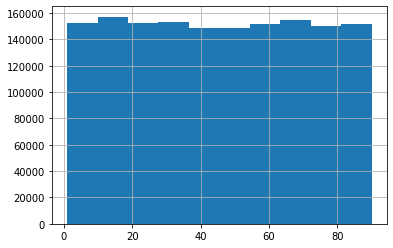

In [8]:
df['locdt'].hist() # 授權日期在每一天的分布差不多

In [9]:
df = pd.get_dummies(df)
df_train = df[df['locdt']<72]
df_test = df[df['locdt']>=72]
print(f'df_train:{df_train.shape}')
print(f'df_test:{df_test.shape}')
assert df_train.shape[0]+df_test.shape[0] == 1521787

df_train:(1201283, 28)
df_test:(320504, 28)


In [10]:
df.isna().sum()

acqic          0
bacno          0
cano           0
conam          0
contp          0
csmcu          0
etymd          0
fraud_ind      0
hcefg          0
iterm          0
locdt          0
loctm          0
mcc            0
mchno          0
scity          0
stocn          0
stscd          0
txkey          0
ecfg_N         0
ecfg_Y         0
flbmk_N        0
flbmk_Y        0
flg_3dsmk_N    0
flg_3dsmk_Y    0
insfg_N        0
insfg_Y        0
ovrlt_N        0
ovrlt_Y        0
dtype: int64

In [11]:
y_train = df_train['fraud_ind']
y_test = df_test['fraud_ind']
X_train = df_train.drop(columns=['fraud_ind','txkey'])
X_test = df_test.drop(columns=['fraud_ind','txkey'])
print(f'X_train:{X_train.shape}')
print(f'y_train:{y_train.shape}')
print(f'X_test:{X_test.shape}')
print(f'y_test:{y_test.shape}')

X_train:(1201283, 26)
y_train:(1201283,)
X_test:(320504, 26)
y_test:(320504,)


# 亂猜時accuracy 0.9865, roc_auc 0.5

In [12]:
from sklearn.metrics import roc_auc_score, classification_report, f1_score

In [13]:
y_test.value_counts()[0] / len(y_test) # 全猜非盜刷有 99.06% 準確率

0.9906366223198463

In [172]:
y_guess = pd.DataFrame(np.arange(320504))
y_guess.shape

(320504, 1)

In [173]:
y_guess[0] = 1

In [174]:
print(classification_report(y_test,y_guess))

C:\Users\YEN32\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    317503
           1       0.01      1.00      0.02      3001

    accuracy                           0.01    320504
   macro avg       0.00      0.50      0.01    320504
weighted avg       0.00      0.01      0.00    320504



In [175]:
roc_auc_score(y_test,y_guess)

0.5

# 建立基準比較模型

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [101]:
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score

## CV中表現好(random forest)，樣本外預測力低，為什麼？
### logistic regression 基本狀況

In [176]:
cv_results = cross_validate(LogisticRegression(max_iter=1000), X_train, y_train, cv=5,scoring=['accuracy','recall','precision','f1','roc_auc'])

In [177]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_f1', 'test_roc_auc'])

In [178]:
print(f'accuracy:\t{cv_results["test_accuracy"]}')
print(f'recall:\t\t{cv_results["test_recall"]}')
print(f'precision:\t{cv_results["test_precision"]}')
print(f'f1:\t\t{cv_results["test_f1"]}')
print(f'auroc:\t\t{cv_results["test_roc_auc"]}')  

accuracy:	[0.98548221 0.98549886 0.98553632 0.98555291 0.98548215]
recall:		[0.        0.        0.0002881 0.        0.0005762]
precision:	[0.         0.         0.16666667 0.         0.0952381 ]
f1:		[0.         0.         0.00057521 0.         0.00114548]
auroc:		[0.83016891 0.82648879 0.82757193 0.83138916 0.83439293]


In [179]:
LR_model = LogisticRegression(max_iter=1000)
trained_LR_model = LR_model.fit(X_train,y_train)
Y_pred = trained_LR_model.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    317503
           1       0.23      0.00      0.00      3001

    accuracy                           0.99    320504
   macro avg       0.61      0.50      0.50    320504
weighted avg       0.98      0.99      0.99    320504



In [180]:
roc_auc_score(y_test,Y_pred)

0.501128482988891

### random forest 基本狀況

In [181]:
cv_results = cross_validate(RandomForestClassifier(), X_train, y_train, cv=5,scoring=['accuracy','recall','precision','f1','roc_auc'])

In [182]:
cv_results.keys()

dict_keys(['fit_time', 'score_time', 'test_accuracy', 'test_recall', 'test_precision', 'test_f1', 'test_roc_auc'])

In [183]:
print(f'accuracy:\t{cv_results["test_accuracy"]}')
print(f'recall:\t\t{cv_results["test_recall"]}')
print(f'precision:\t{cv_results["test_precision"]}')
print(f'f1:\t\t{cv_results["test_f1"]}')
print(f'auroc:\t\t{cv_results["test_roc_auc"]}')      

accuracy:	[0.99426864 0.99416042 0.99439767 0.99399391 0.99395645]
recall:		[0.67847882 0.66695477 0.68827427 0.66195965 0.6539902 ]
precision:	[0.90022936 0.90359094 0.90049001 0.89481885 0.90043633]
f1:		[0.77378019 0.76744572 0.78020901 0.76097399 0.7576769 ]
auroc:		[0.98686476 0.98427388 0.98734913 0.98458215 0.98408536]


In [184]:
RF = RandomForestClassifier()
trained_RF = RF.fit(X_train,y_train)
Y_pred = trained_RF.predict(X_test)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    317503
           1       0.71      0.35      0.47      3001

    accuracy                           0.99    320504
   macro avg       0.85      0.67      0.73    320504
weighted avg       0.99      0.99      0.99    320504



In [185]:
roc_auc_score(y_test,Y_pred) # 測試數據的 auroc 由 cv的0.98左右降到0.67

0.6727681765585817

In [63]:
f1_score(y_test,Y_pred) # 測試數據的 f1 由 cv的0.77左右降到0.457

0.45697980684811235

### 排除日期因子 看看能否減低過度擬合  (沒什麼用)

In [16]:
X_train_no_date = X_train.drop(columns='locdt')
X_test_no_date = X_test.drop(columns='locdt')
print(X_train_no_date.shape)
print(X_test_no_date.shape)

(1201283, 25)
(320504, 25)


In [64]:
cv_results = cross_validate(RandomForestClassifier(), X_train_no_date, y_train, cv=3,scoring=['accuracy','recall','precision','f1','roc_auc'])
print(f'accuracy:\t{cv_results["test_accuracy"]}')
print(f'recall:\t\t{cv_results["test_recall"]}')
print(f'precision:\t{cv_results["test_precision"]}')
print(f'f1:\t\t{cv_results["test_f1"]}')
print(f'auroc:\t\t{cv_results["test_roc_auc"]}')      

accuracy:	[0.9936493  0.99375169 0.99345449]
recall:		[0.64891962 0.65583405 0.63710235]
precision:	[0.87998125 0.88130081 0.87592108]
f1:		[0.74699035 0.75203171 0.7376639 ]
auroc:		[0.98233047 0.98343333 0.97992882]


In [18]:
RF = RandomForestClassifier()
trained_RF = RF.fit(X_train_no_date,y_train)
Y_pred = trained_RF.predict(X_test_no_date)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    317503
           1       0.67      0.35      0.46      3001

    accuracy                           0.99    320504
   macro avg       0.83      0.67      0.73    320504
weighted avg       0.99      0.99      0.99    320504



In [19]:
roc_auc_score(y_test,Y_pred) # 樣本外預測力與CV有差距 不是日期造成的

0.6726327447673861

In [22]:
f1_score(y_test,Y_pred) # 樣本外預測力與CV有差距 不是日期造成的

0.45697980684811235

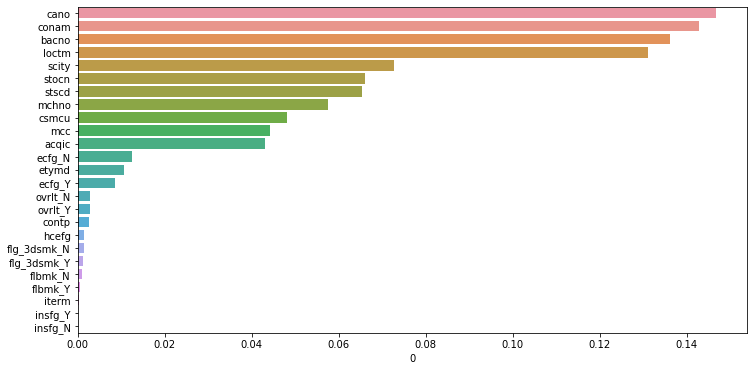

In [51]:
data=pd.DataFrame(trained_RF.feature_importances_,X_train_no_date.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=0,y=data.index,data=data)

In [61]:
np.isin(X_train['cano'].unique(),X_test['cano']).sum()/len(X_test['cano'].unique()) 
# train中的 cano 有91.7%出現在 test 中

0.9169572069920718

In [62]:
np.isin(X_train['bacno'].unique(),X_test['bacno']).sum()/len(X_test['bacno'].unique()) 
# train中的 bacno 有95.5%出現在 test 中c

0.9549401282560581

### 排除卡號與帳號 看看能否減低過度擬合 (沒什麼用)

In [65]:
X_train_no_num = X_train.drop(columns=['cano','bacno'])
X_test_no_num = X_test.drop(columns=['cano','bacno'])
print(X_train_no_num.shape)
print(X_test_no_num.shape)

(1201283, 24)
(320504, 24)


In [66]:
cv_results = cross_validate(RandomForestClassifier(), X_train_no_num, y_train, cv=3,scoring=['accuracy','recall','precision','f1','roc_auc'])
print(f'accuracy:\t{cv_results["test_accuracy"]}')
print(f'recall:\t\t{cv_results["test_recall"]}')
print(f'precision:\t{cv_results["test_precision"]}')
print(f'f1:\t\t{cv_results["test_f1"]}')
print(f'auroc:\t\t{cv_results["test_roc_auc"]}')      

accuracy:	[0.99238565 0.99251301 0.99197107]
recall:		[0.60155575 0.61417459 0.58696404]
precision:	[0.82386364 0.82264413 0.80431177]
f1:		[0.69537416 0.70328583 0.67866067]
auroc:		[0.96550167 0.96684958 0.96825067]


In [67]:
RF = RandomForestClassifier()
trained_RF = RF.fit(X_train_no_num,y_train)
Y_pred = trained_RF.predict(X_test_no_num)
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    317503
           1       0.53      0.32      0.40      3001

    accuracy                           0.99    320504
   macro avg       0.76      0.66      0.70    320504
weighted avg       0.99      0.99      0.99    320504



In [68]:
roc_auc_score(y_test,Y_pred)

0.6579211976432607

In [72]:
trained_RF.n_features_

24

In [74]:
X_train_no_num.columns

Index(['acqic', 'conam', 'contp', 'csmcu', 'etymd', 'hcefg', 'iterm', 'locdt',
       'loctm', 'mcc', 'mchno', 'scity', 'stocn', 'stscd', 'ecfg_N', 'ecfg_Y',
       'flbmk_N', 'flbmk_Y', 'flg_3dsmk_N', 'flg_3dsmk_Y', 'insfg_N',
       'insfg_Y', 'ovrlt_N', 'ovrlt_Y'],
      dtype='object')

In [88]:
feature = 'stscd' # 檢差一輪 column，幾乎沒有在 train 與 test nunique 差別大的欄位
np.isin(X_train[feature].unique(),X_test[feature]).sum()/len(X_test[feature].unique())

1.0

### 手動CV 細看過度擬合

In [97]:
df_train1 = df[df['locdt']<24]
df_train2 = df[(df['locdt']>=24) & (df['locdt']<48)]
df_train3 = df[(df['locdt']>=48) & (df['locdt']<72)]

y_train1 = df_train1['fraud_ind']
y_train2 = df_train2['fraud_ind']
y_train3 = df_train3['fraud_ind']
X_train1 = df_train1.drop(columns=['fraud_ind','txkey'])
X_train2 = df_train2.drop(columns=['fraud_ind','txkey'])
X_train3 = df_train3.drop(columns=['fraud_ind','txkey'])

print(f'X_train1:{X_train1.shape}')
print(f'y_train1:{y_train1.shape}')
print(f'X_train2:{X_train2.shape}')
print(f'y_train2:{y_train2.shape}')
print(f'X_train3:{X_train3.shape}')
print(f'y_train3:{y_train3.shape}')

X_train1:(394406, 26)
y_train1:(394406,)
X_train2:(402928, 26)
y_train2:(402928,)
X_train3:(403949, 26)
y_train3:(403949,)


In [98]:
RF = RandomForestClassifier()
trained_RF1 = RF.fit(X_train1,y_train1)
Y_pred2 = trained_RF1.predict(X_train2)
print(classification_report(y_train2,Y_pred2))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    395331
           1       0.71      0.42      0.53      7597

    accuracy                           0.99    402928
   macro avg       0.85      0.71      0.76    402928
weighted avg       0.98      0.99      0.98    402928



In [103]:
print(f1_score(y_train2,Y_pred2))
print(roc_auc_score(y_train2,Y_pred2))

0.5297029702970296
0.709606971886386


In [99]:
RF = RandomForestClassifier()
trained_RF2 = RF.fit(X_train2,y_train2)
Y_pred3 = trained_RF2.predict(X_train3)
print(classification_report(y_train3,Y_pred3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    398955
           1       0.65      0.38      0.48      4994

    accuracy                           0.99    403949
   macro avg       0.82      0.69      0.74    403949
weighted avg       0.99      0.99      0.99    403949



In [104]:
print(f1_score(y_train3,Y_pred3))
print(roc_auc_score(y_train3,Y_pred3))

0.4753203908133486
0.6862542100187481


In [100]:
RF = RandomForestClassifier()
trained_RF3 = RF.fit(X_train3,y_train3)
Y_pred1 = trained_RF3.predict(X_train1)
print(classification_report(y_train1,Y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    389643
           1       0.66      0.31      0.42      4763

    accuracy                           0.99    394406
   macro avg       0.82      0.65      0.71    394406
weighted avg       0.99      0.99      0.99    394406



In [105]:
print(f1_score(y_train1,Y_pred1)) # 自己拆樣本做cv，各項指標跟用cross_validate差很多
print(roc_auc_score(y_train1,Y_pred1))

0.4202256820454221
0.6534352492325338


In [106]:
print(cross_val_score(RandomForestClassifier(), X=X_train, y=y_train, cv=3,scoring='f1')) 
# 莫名其妙用 cross_val_score 做出來特別好看

[0.75       0.75585218 0.74208417]


In [108]:
# predict改為predict_proba，會使預測結果由0/1變成機率
RF = RandomForestClassifier()
trained_RF1 = RF.fit(X_train1,y_train1)
Y_pred2 = trained_RF1.predict_proba(X_train2)
# print(classification_report(y_train2,Y_pred2))

In [134]:
# 改成輸出機率侯 roc_auc_score變得很好看，但 f1_score 不收機率
# f1_score(y_train2,pd.DataFrame(Y_pred2)[1])
print(roc_auc_score(y_train2,pd.DataFrame(Y_pred2)[1]))

0.9573126555269895


In [135]:
RF = RandomForestClassifier()
trained_RF3 = RF.fit(X_train3,y_train3)
Y_pred1 = trained_RF3.predict_proba(X_train1)
# print(classification_report(y_train3,Y_pred3))

In [136]:
# print(f1_score(y_train3,Y_pred3))
print(roc_auc_score(y_train3,pd.DataFrame(Y_pred3)[1]))

KeyError: 1

# EDA2

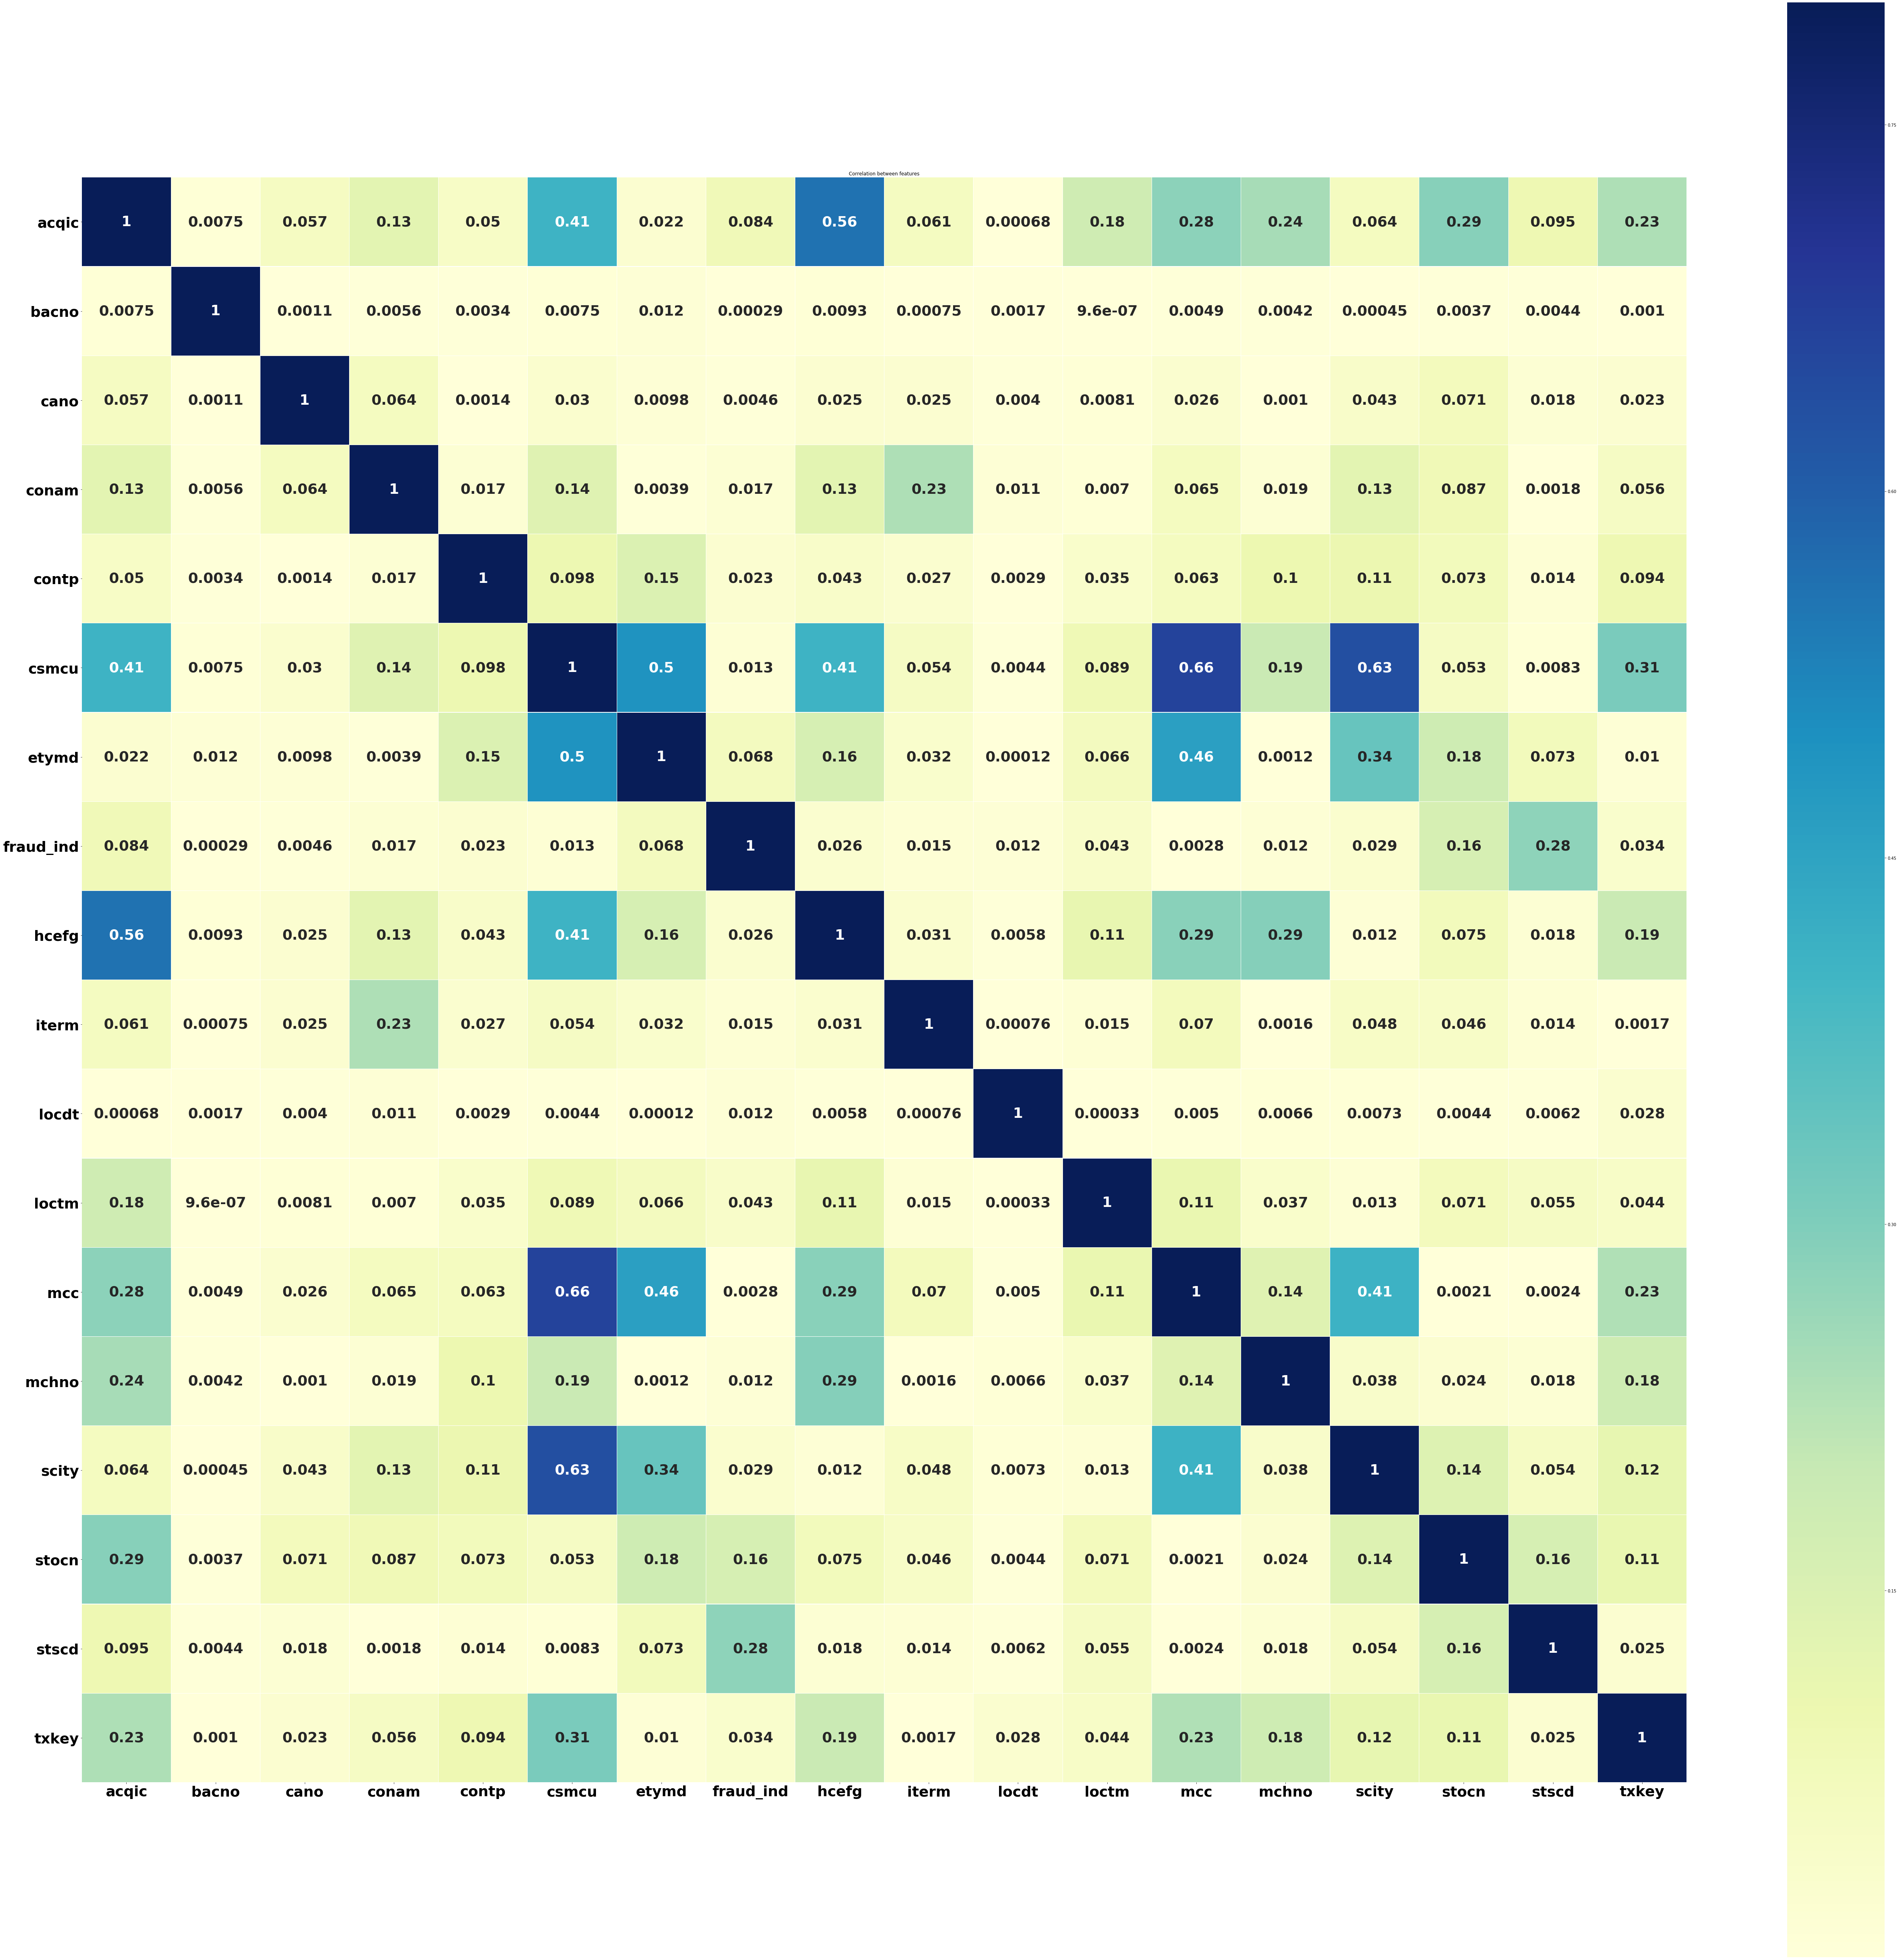

In [130]:
# fraud_ind 只與 stscd狀態碼及stocn消費地國別稍有關連，與其他的則相關係數非常低
plt.figure(figsize=(90,90))
cor = df.corr().abs()
sns.heatmap(cor, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white",annot_kws={"size":36,'fontweight':'bold'})
plt.title('Correlation between features')
plt.xticks(fontsize=36,fontweight='bold',rotation=0)
plt.yticks(fontsize=36,fontweight='bold',rotation=0)

# 以下為解決heatmap被裁邊的方式
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

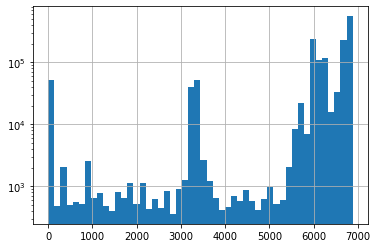

In [195]:
df['acqic'].hist(bins=50,log=True) # 收單行代碼

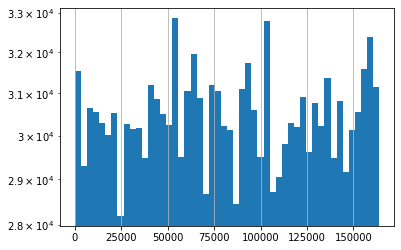

In [196]:
df['bacno'].hist(bins=50,log=True) # 歸戶帳號

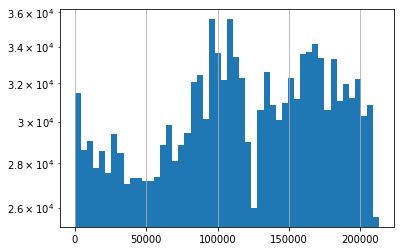

In [197]:
df['cano'].hist(bins=50,log=True) # 交易卡號

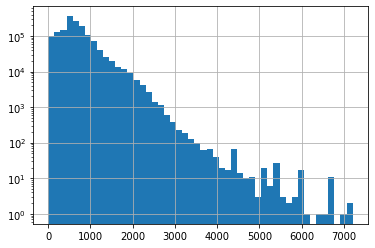

In [198]:
df['conam'].hist(bins=50,log=True) # 交易金額

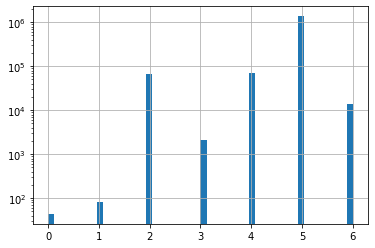

In [199]:
df['contp'].hist(bins=50,log=True) # 交易類別

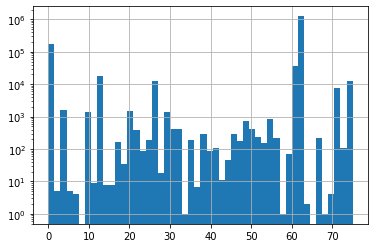

In [200]:
df['csmcu'].hist(bins=50,log=True) # 消費地幣別

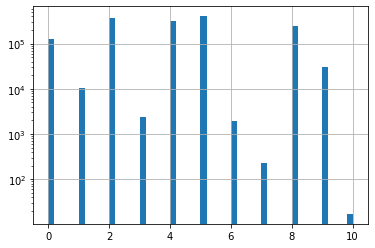

In [201]:
df['etymd'].hist(bins=50,log=True) # 交易型態

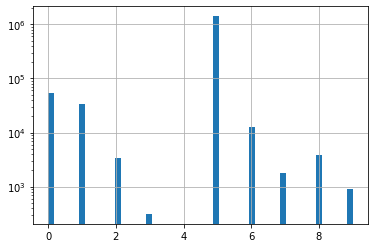

In [202]:
df['hcefg'].hist(bins=50,log=True) # 支付型態

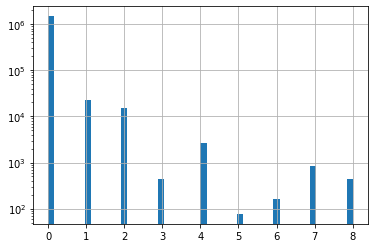

In [203]:
df['iterm'].hist(bins=50,log=True) # 分期期數

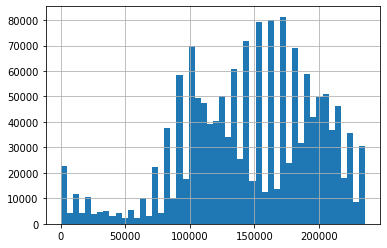

In [205]:
df['loctm'].hist(bins=50,log=False) # 授權時間

In [206]:
df['loctm'].max()

235959.0

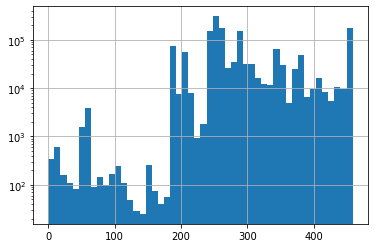

In [208]:
df['mcc'].hist(bins=50,log=True) # MCC_CODE

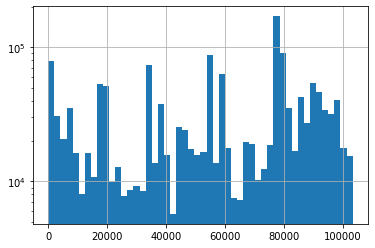

In [209]:
df['mchno'].hist(bins=50,log=True) # 特店代號

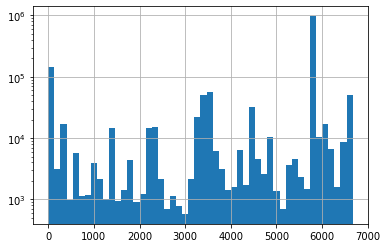

In [210]:
df['scity'].hist(bins=50,log=True) # 消費城市

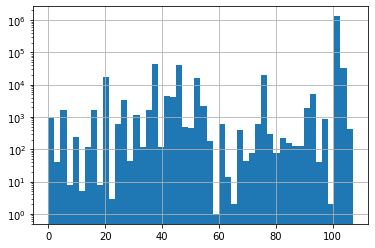

In [211]:
df['stocn'].hist(bins=50,log=True) # 消費地國別

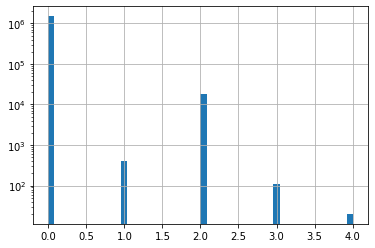

In [212]:
df['stscd'].hist(bins=50,log=True) # 狀態碼

### 時間排序可依歸戶帳號、交易卡號、特店代號、收單行代碼、消費地國別、消費城市、消費地幣別